In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import requests
from bs4 import BeautifulSoup

import os
from tqdm import tqdm

2022-04-05 06:42:44.847345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 06:42:44.847379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import FinanceDataReader as fdr

In [45]:
# KT&G 주가 2005~Now
# 4263 rows

ktng = fdr.DataReader('033780', '2005-01-01', '2022-04-04')
ktng.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-01-03,31000,31150,30650,30650,259867,-0.009693
2005-01-04,30850,31250,30650,31000,321100,0.011419
2005-01-05,31000,31650,30900,31500,635585,0.016129
2005-01-06,31850,31900,31000,31000,420824,-0.015873
2005-01-07,31150,31500,31000,31200,296535,0.006452


In [46]:
ktng.tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-03-29,81000,81100,80500,81100,157378,0.003713
2022-03-30,81300,81300,80600,80900,204322,-0.002466
2022-03-31,81000,81200,80600,80700,250995,-0.002472
2022-04-01,80500,81100,80400,81000,199768,0.003717
2022-04-04,81000,81400,80900,81400,156848,0.004938


In [47]:
ktng

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2005-01-03,31000,31150,30650,30650,259867,-0.009693
2005-01-04,30850,31250,30650,31000,321100,0.011419
2005-01-05,31000,31650,30900,31500,635585,0.016129
2005-01-06,31850,31900,31000,31000,420824,-0.015873
2005-01-07,31150,31500,31000,31200,296535,0.006452
...,...,...,...,...,...,...
2022-03-29,81000,81100,80500,81100,157378,0.003713
2022-03-30,81300,81300,80600,80900,204322,-0.002466
2022-03-31,81000,81200,80600,80700,250995,-0.002472


<AxesSubplot:xlabel='Date'>

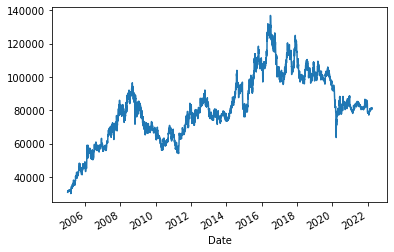

In [48]:
ktg = fdr.DataReader('033780', '2005')
ktg['Close'].plot()

In [49]:
book = pd.read_excel("./Book.xlsx")
book

,Unnamed: 0,매출액,영업이익,영업이익률
0,2005-01-01,3964,968,24.4
1,2005-01-02,3964,968,24.4
2,2005-01-03,3964,968,24.4
3,2005-01-04,3964,968,24.4
4,2005-01-05,3964,968,24.4
...,...,...,...,...
6298,2022-03-31,12761,3125,24.5
6299,2022-04-01,12761,3125,24.5
6300,2022-04-02,12761,3125,24.5
6301,2022-04-03,12761,3125,24.5


In [50]:
book.columns = ['Date','매출액', '영업이익', '영업이익률']

In [51]:
book.Date

0      2005-01-01
1      2005-01-02
2      2005-01-03
3      2005-01-04
4      2005-01-05
          ...    
6298   2022-03-31
6299   2022-04-01
6300   2022-04-02
6301   2022-04-03
6302   2022-04-04
Name: Date, Length: 6303, dtype: datetime64[ns]

In [52]:
ktng_merge = pd.merge(ktng, book, how='outer', on='Date')

In [53]:
ktng_merge

,Date,Open,High,Low,Close,Volume,Change,매출액,영업이익,영업이익률
0,2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693,3964,968,24.4
1,2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,3964,968,24.4
2,2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,3964,968,24.4
3,2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,3964,968,24.4
4,2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452,3964,968,24.4
...,...,...,...,...,...,...,...,...,...,...
4261,2022-03-29,81000.0,81100.0,80500.0,81100.0,157378.0,0.003713,12761,3125,24.5
4262,2022-03-30,81300.0,81300.0,80600.0,80900.0,204322.0,-0.002466,12761,3125,24.5
4263,2022-03-31,81000.0,81200.0,80600.0,80700.0,250995.0,-0.002472,12761,3125,24.5
4264,2022-04-01,80500.0,81100.0,80400.0,81000.0,199768.0,0.003717,12761,3125,24.5


매출액 : KT&G의 총 매출액 
영업이익 : 영업활동을 통하여 획득한 이익(손실), 전체 매출액에서 제조에 들어가는 매출원가와 영업활동에 들어가는 비용인 판관비를 제외하고 남은 수익
영업이익률 : 제조 단계에서 원가가 높거나 판매 단계에서 효율적이지 못하면 영업이익률이 떨어지게 된다
= 영업이익/매출액 x 100 : 

In [54]:
ktng_merge.set_index('Date',inplace=True)
ktng_merge = ktng_merge.astype('float')
ktng_merge

,Open,High,Low,Close,Volume,Change,매출액,영업이익,영업이익률
Date,,,,,,,,,
2005-01-03,31000.0,31150.0,30650.0,30650.0,259867.0,-0.009693,3964.0,968.0,24.4
2005-01-04,30850.0,31250.0,30650.0,31000.0,321100.0,0.011419,3964.0,968.0,24.4
2005-01-05,31000.0,31650.0,30900.0,31500.0,635585.0,0.016129,3964.0,968.0,24.4
2005-01-06,31850.0,31900.0,31000.0,31000.0,420824.0,-0.015873,3964.0,968.0,24.4
2005-01-07,31150.0,31500.0,31000.0,31200.0,296535.0,0.006452,3964.0,968.0,24.4
...,...,...,...,...,...,...,...,...,...
2022-03-29,81000.0,81100.0,80500.0,81100.0,157378.0,0.003713,12761.0,3125.0,24.5
2022-03-30,81300.0,81300.0,80600.0,80900.0,204322.0,-0.002466,12761.0,3125.0,24.5
2022-03-31,81000.0,81200.0,80600.0,80700.0,250995.0,-0.002472,12761.0,3125.0,24.5


In [55]:
ktng_merge.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
Change    float64
매출액       float64
영업이익      float64
영업이익률     float64
dtype: object

In [56]:
ktng_merge.shape

(4266, 9)

In [57]:
scaler = MinMaxScaler()

In [58]:
price = scaler.fit_transform(ktng_merge)

In [59]:
price = scaler.fit_transform(ktng_merge)
price[:3]

array([[0.01022305, 0.00321987, 0.00804163, 0.006539  , 0.0246721 ,
        0.37907277, 0.        , 0.        , 0.21959459],
       [0.008829  , 0.00413983, 0.00804163, 0.0098085 , 0.03206319,
        0.48567394, 0.        , 0.        , 0.21959459],
       [0.01022305, 0.00781969, 0.01040681, 0.01447922, 0.07002292,
        0.50945478, 0.        , 0.        , 0.21959459]])

In [60]:
window_size = 10
X = []
Y = []

for i in range(len(price) - window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i][0])

In [61]:
X = np.array(X)
Y = np.array(Y)

In [62]:
X.shape

(4256, 10, 9)

In [63]:
Y.shape

(4256,)

In [128]:
# 80:20 
tt_split = 3400

x_train = X[:tt_split]
y_train = Y[:tt_split]

x_test = X[tt_split:]
y_test = Y[tt_split:]

In [129]:
x_train.shape

(3400, 10, 9)

In [130]:
y_train.shape

(3400,)

In [131]:
x_test.shape

(856, 10, 9)

In [132]:
y_test.shape

(856,)

In [70]:
model = Sequential()
model.add(LSTM(100, input_shape=(10, 9)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               44000     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 44,101
Trainable params: 44,101
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='mse', optimizer='adam')

In [73]:
model.fit(x_train, y_train, epochs=30, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/30
340/340 [==============================] - 1s 3ms/step - loss: 2.4044e-04 - val_loss: 1.0390e-04
Epoch 2/30
340/340 [==============================] - 1s 3ms/step - loss: 2.4491e-04 - val_loss: 4.1421e-05
Epoch 3/30
340/340 [==============================] - 1s 3ms/step - loss: 2.2891e-04 - val_loss: 4.1792e-05
Epoch 4/30
340/340 [==============================] - 1s 3ms/step - loss: 2.2779e-04 - val_loss: 5.4549e-05
Epoch 5/30
340/340 [==============================] - 1s 3ms/step - loss: 2.4165e-04 - val_loss: 5.1833e-05
Epoch 6/30
340/340 [==============================] - 1s 3ms/step - loss: 2.5085e-04 - val_loss: 3.7998e-05
Epoch 7/30
340/340 [==============================] - 1s 3ms/step - loss: 2.2433e-04 - val_loss: 5.5326e-05
Epoch 8/30
340/340 [==============================] - 1s 3ms/step - loss: 2.3337e-04 - val_loss: 3.5393e-05
Epoch 9/30
340/340 [==============================] - 1s 3ms/step - loss: 2.3309e-04 - val_loss: 4.7902e-05
Epoch 10/30
340/340 [=======

In [74]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

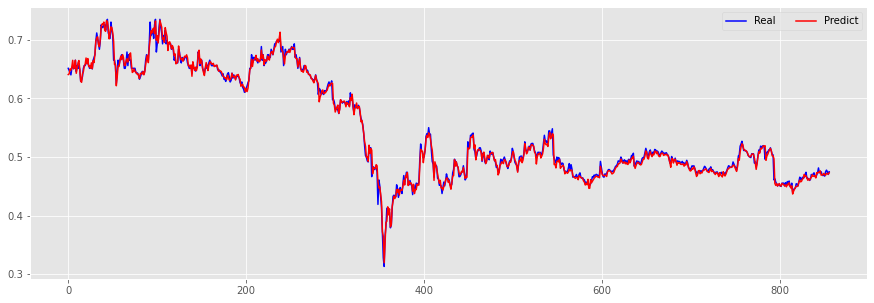

In [121]:
plt.figure(figsize=(15,5))

plt.plot(price[-856:,0], color='b',label='Real')
plt.plot(x_test_pred[-856:], color='r',label='Predict')
plt.style.use('ggplot')
plt.legend(loc='best', ncol=2) 
plt.show()

In [111]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(10,9)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 8)                 144       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [113]:
hist = model.fit(x_train.astype(float), y_train, epochs=30, batch_size=64, validation_data=(x_test.astype(float), y_test))

Epoch 1/30
54/54 [==============================] - 1s 4ms/step - loss: 0.6418 - accuracy: 5.8824e-04 - val_loss: 0.6874 - val_accuracy: 0.0000e+00
Epoch 2/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 5.8824e-04 - val_loss: 0.6819 - val_accuracy: 0.0000e+00
Epoch 3/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 5.8824e-04 - val_loss: 0.6773 - val_accuracy: 0.0000e+00
Epoch 4/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 5.8824e-04 - val_loss: 0.6747 - val_accuracy: 0.0000e+00
Epoch 5/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 5.8824e-04 - val_loss: 0.6748 - val_accuracy: 0.0000e+00
Epoch 6/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 5.8824e-04 - val_loss: 0.6748 - val_accuracy: 0.0000e+00
Epoch 7/30
54/54 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 5.8824e-04 - val_loss